In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.10.0


In [3]:
#Dados de casas em Boston
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49082/49082 [==============================] - 0s 3us/step


In [4]:
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

#Carga dos dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [5]:
#Partição dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

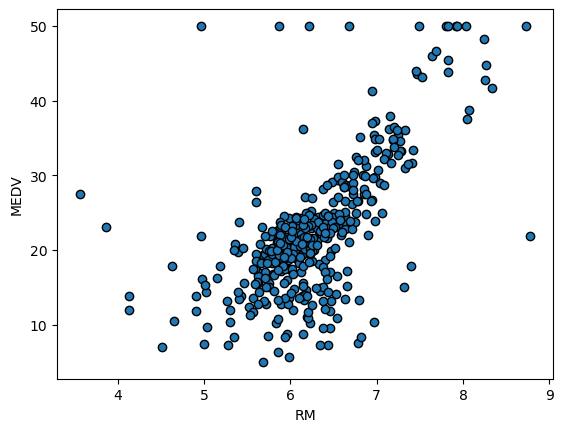

In [6]:
#Gráfico de dispersão
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()
# RM = média de quartos
# MEDV = mediana das casas ocupadas

In [7]:
#Separação de X e Y
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compilador do modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

#MAE = Mean Absolute Error
#MSE = Mean Squared Error

In [9]:
# Criação do modelo 
modelo = modelo_linear()

# Gráfico do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
# Hiperparâmetros (controlam os parametros)
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

# Callback (evita que o modelo "aprenda demais")
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

Checkpoint salvo a cada 81000 amostras


In [17]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)
                                                 
# Lista para as previsões
predictions_list = []

# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

# Salva um checkpoint de backup em caso de erro no treino do modelo
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [18]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
